## 扔骰子

In [1]:
import torch
from torch.distributions import multinomial
from d2l import torch as d2l

In [2]:
fair_probs = torch.ones([6]) / 6
fair_probs

tensor([0.1667, 0.1667, 0.1667, 0.1667, 0.1667, 0.1667])

In [3]:
# 按照指定的概率，在多项式分布中采样一次
multinomial.Multinomial(1, fair_probs).sample()

tensor([1., 0., 0., 0., 0., 0.])

In [4]:
# 按照指定的概率，在多项式分布中采样多次
multinomial.Multinomial(1000, fair_probs).sample()

tensor([161., 182., 174., 158., 164., 161.])

In [5]:
# 计算采样得到的概率
counts = multinomial.Multinomial(1000, fair_probs).sample()
counts / 1000

tensor([0.1570, 0.1740, 0.1740, 0.1710, 0.1740, 0.1500])

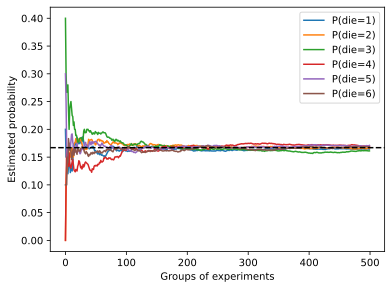

In [6]:
# 做500组实验，每组实验抽10个样本，并将结果可视化
counts = multinomial.Multinomial(10, fair_probs).sample((500,))
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)

d2l.set_figsize((6, 4.5))
for i in range(6):
    d2l.plt.plot(estimates[:, i].numpy(), label=("P(die=" + str(i + 1) + ")"))
d2l.plt.axhline(y=0.167, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('Groups of experiments')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend()

## 联合概率
$P(A = a, B = b)$，表示$A=a$和$B=b$同时发生的概率。

## 条件概率
由联合概率的性质可以得到：$0 \le \frac{P(A=a,B=b)}{P(A=a)}\le 1$。

$P(B=b \mid A=a) = \frac{P(A=a,B=b)}{P(A=a)}$，表示在$A=a$的条件下，发生$B=b$的概率。

## 贝叶斯定理
根据条件概率，我们可以得到$P(A,B) = P(B \mid A)P(A) = P(A \mid B)P(B)$。

假设$P(B)>0)$，可以得到：
$$P(A \mid B) = \frac{P(B \mid A)P(A)}{P(B)}$$


## 边际化
通过贝叶斯定理，我们可以从一件事推断出另一件事，就像是因果关系，知道其中一个就可以计算出另一个。

边际化是从${P(A,B)}$中确定${P(B)}$的操作。
$$ P(B)=\sum_A P(A,B) $$

## 独立性
两个随机变量A和B是独立的，意味着事件A的发生和事件B的发生是没有关系的，统计学家将这一点表述为$A \perp B$，即$P(A|B) = P(A)$。

由于$P(A|B) = \frac{P(A,B)}{P(B)}=P(A)$，所以$P(A,B) = P(A)P(B)$。同样给定另一个随机变量$C$，以及相互独立的$A$和$B$，那么$P(A,B|C) = P(A|C)P(B|C)$，这种情况表示为$A \perp B \mid C$

## 应用

假设一个医生对患者进行艾滋病病毒（HIV）测试。这个测试是相当准确的，如果患者健康但测试显示他患病，这样的失败概率只有 1% 。此外，如果患者真正感染HIV，它永远不会检测不出。我们使用 $D_1$ 来表示诊断结果（如果阳性，则为 $1$，如果阴性，则为 $0$），$H$ 来表示感染艾滋病病毒的状态（如果阳性，则为 $1$，如果阴性，则为0）。
下表是对应的条件概率$P(D_1 \mid H)$：


| 条件概率 | $H=1$ | $H=0$ |
|----|----|----|
|$P(D_1 = 1 \mid H)$|            1 |         0.01 |
|$P(D_1 = 0 \mid H)$|            0 |         0.99 |


请注意，每列的加和都是 1（但每行的加和不是），因为条件概率需要总和为1，就像概率一样。让我们计算如果测试出来呈阳性，患者感染HIV的概率，即 $P(H = 1 \mid D_1 = 1)$。显然，这将取决于疾病有多常见，因为它会影响错误警报的数量。假设人口总体是相当健康的，例如，$P(H=1) = 0.0015$。根据贝叶斯定理可以得到：

$$P(H = 1 \mid D_1 = 1) = \frac{P(D_1 = 1 | H = 1)P(H=1)}{P(D_1=1)}$$

其中$P(D_1 = 1)$可以通过边际化得到：

$$\begin{aligned}
&P(D_1=1)\\
=&P(D_1=1, H=0) + P(D_1=1, H=1)\\
=&P(D_1=1|H=0)P(H=0) + P(D_1=1|H=1)P(H=1) \\
=&0.011485.
\end{aligned}
$$

因此$P(H = 1 \mid D_1 = 1) = 0.1306.$，诊断为阳性，实际为阳性的概率仅有13.06%。




患者在收到这样可怕的消息后应该怎么办？很可能，患者会要求医生进行另一次测试来了解清楚。第二个测试具有不同的特性，它不如第一个测试那么好，对应条件概率为$P(D_2 \mid H)$:

| 条件概率 | $H=1$ | $H=0$ |
|---|---|---|
|$P(D_2 = 1 \mid H)$|            0.98 |         0.03 |
|$P(D_2 = 0 \mid H)$|            0.02 |         0.97 |


不幸的是，第二次测试也显示阳性。让我们通过假设条件独立性来计算出应用 Bayes 定理的必要概率：

$$\begin{aligned}
&P(D_1 = 1, D_2 = 1 \mid H = 0) \\
=& P(D_1 = 1 \mid H = 0) P(D_2 = 1 \mid H = 0)  \\
=& 0.0003,
\end{aligned}
$$

$$\begin{aligned}
&P(D_1 = 1, D_2 = 1 \mid H = 1) \\
=& P(D_1 = 1 \mid H = 1) P(D_2 = 1 \mid H = 1)  \\
=& 0.98.
\end{aligned}
$$

现在我们可以应用边际化和乘法规则：

$$\begin{aligned}
&P(D_1 = 1, D_2 = 1) \\
=& P(D_1 = 1, D_2 = 1, H = 0) + P(D_1 = 1, D_2 = 1, H = 1)  \\
=& P(D_1 = 1, D_2 = 1 \mid H = 0)P(H=0) + P(D_1 = 1, D_2 = 1 \mid H = 1)P(H=1)\\
=& 0.00176955.
\end{aligned}
$$

最后，鉴于存在两次阳性检测，患者患有艾滋病的概率为

$$\begin{aligned}
&P(H = 1 \mid D_1 = 1, D_2 = 1)\\
=& \frac{P(D_1 = 1, D_2 = 1 \mid H=1) P(H=1)}{P(D_1 = 1, D_2 = 1)} \\
=& 0.8307.
\end{aligned}
$$

也就是说，第二次测试使我们能够对患病的情况获得更高的信心。尽管第二次检验比第一次检验的准确性要低得多，但它仍然显著改善了我们的估计。

## 期望和方差
随机变量$X$的期望(平均值)表示为$E[X]=\sum_x xP(X=x)$。

随机变量$X$和期望的偏置，可以使用方差来量化：$Var[X]=E[(X-E[X])^2]=E[x^2]-E[x]^2$